## Include and load data

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Uncomment the following lines to fuse multiple scores.json files
# # Load all scores
# all_scores = None
# initial_path = "../outputs/scores/"
# for dir in os.listdir(initial_path):
#     if os.path.isdir(os.path.join(initial_path, dir)):
#         path = os.path.join(initial_path, dir)
#         for subdir in os.listdir(path):
#             if os.path.isdir(os.path.join(path, subdir)):
#                 with open(f"{os.path.join(path, subdir)}/scores.json", "r", encoding="utf-8") as f:
#                     data = json.load(f)
#                     if all_scores is None:
#                         all_scores = data["scores"]#(nb_episodes, nb_transitions, nb_rules, nb_possibilities)
#                         all_rules = data["rules"] #(nb_rules)
#                         all_index_true = data["true_obs_index"] #(nb_episodes, nb_transitions)
#                         algorithm_used = data["algorithm_used"] # (nb_rules)
#                         all_transition_type = data["transition_type"] #(nb_episodes, nb_transitions)
#                     else:
#                         # Fuse scores
#                         for i_episode,score_episode in enumerate(all_scores):
#                             for i_transition,score_transition in enumerate(score_episode):
#                                 score_transition.extend(data["scores"][i_episode][i_transition])
#                         all_rules.extend(data["rules"])
#                         algorithm_used.extend(data["algorithm_used"])
#                         assert all_index_true == data["true_obs_index"]
#                         assert all_transition_type == data["transition_type"]
# ## Save the fused scores
# with open(f"{initial_path}/fused_scores.json", "w", encoding="utf-8") as f:
#     json.dump({"scores": all_scores, "rules": all_rules, "true_obs_index": all_index_true, "algorithm_used": algorithm_used, "transition_type": all_transition_type}, f)


# print(len(all_scores), len(all_scores[0]), len(all_scores[0][0]), len(all_scores[0][0][0]))
# print(len(all_rules), len(algorithm_used))

## Fuse the scores with the base one
# with open(f"../outputs/scores/scores.json", "r", encoding="utf-8") as f:
#     data = json.load(f)
#     all_scores = data["scores"]#(nb_episodes, nb_transitions, nb_rules, nb_possibilities)
#     all_rules = data["rules"] #(nb_rules)
#     all_index_true = data["true_obs_index"] #(nb_episodes, nb_transitions)
#     algorithm_used = data["algorithm_used"] # (nb_rules)
#     all_transition_type = data["transition_type"] #(nb_episodes, nb_transitions)
                    
# with open(f"../outputs/scores/scores_trajs.json", "r", encoding="utf-8") as f:
#     data = json.load(f)
#     base_scores = data["scores"]#(nb_episodes, nb_transitions, nb_rules, nb_possibilities)
#     base_rules = data["rules"] #(nb_rules)
#     base_index_true = data["true_obs_index"] #(nb_episodes, nb_transitions)
#     base_algorithm_used = data["algorithm_used"] # (nb_rules)
#     base_transition_type = data["transition_type"] #(nb_episodes, nb_transitions)
    
# #Fuse scores
# for i_episode,score_episode in enumerate(all_scores):
#     for i_transition,score_transition in enumerate(score_episode):
#         score_transition.extend(base_scores[i_episode][i_transition])
# all_rules.extend(base_rules)
# algorithm_used.extend(base_algorithm_used)
# assert all_index_true == base_index_true
# assert all_transition_type == base_transition_type
# # Save the fused scores
# with open(f"../outputs/scores/fused_scores.json", "w", encoding="utf-8") as f:
#     json.dump({"scores": all_scores, "rules": all_rules, "true_obs_index": all_index_true, "algorithm_used": algorithm_used, "transition_type": all_transition_type}, f)

# print(len(all_scores), len(all_scores[0]), len(all_scores[0][0]), len(all_scores[0][0][0]))
# print(len(all_rules), len(algorithm_used))

In [3]:
# Load the data from the file
with open("../outputs/scores/previous_scores.json", "r", encoding="utf-8") as f:
    data = json.load(f)
    all_scores = data["scores"] #(nb_episodes, nb_transitions, nb_rules, nb_possibilities)
    all_rules = data["rules"] #(nb_rules)
    all_index_true = data["true_obs_index"] #(nb_episodes, nb_transitions)
    algorithm_used = data["algorithm_used"] # (nb_rules)
    all_transition_type = data["transition_type"] #(nb_episodes, nb_transitions)

In [4]:
#Replace None by "None"
all_rules = ["None" if x is None else x for x in all_rules]
algorithm_used = ["None" if x is None else x for x in algorithm_used]

In [5]:
# Get the total number of transitions
n_transitions = sum([len(scores) for scores in all_scores])

## Compute the score for each algorithm

In [6]:
#Check if higher score is reached on the true observation for each rule
accuracies = {"Top 1":[0 for _ in range(len(all_rules))], "Top 3":[0 for _ in range(len(all_rules))], "Top 5":[0 for _ in range(len(all_rules))], "Top 10":[0 for _ in range(len(all_rules))]}
for i_rule in range(len(all_rules)):
    for i_episode, score_episode in enumerate(all_scores):
        for i_transition, score_transition in enumerate(score_episode):
            true_score = score_transition[i_rule][all_index_true[i_episode][i_transition]]
            sorted_score_transition = sorted(score_transition[i_rule], reverse=True)
            index_true = sorted_score_transition.index(true_score)
            if index_true < 10:
                accuracies["Top 10"][i_rule] += 1
                if index_true < 5:
                    accuracies["Top 5"][i_rule] += 1
                    if index_true < 3:
                        accuracies["Top 3"][i_rule] += 1
                        if index_true ==0:
                            accuracies["Top 1"][i_rule] += 1                
accuracies = {key: [value/n_transitions for value in values] for key, values in accuracies.items()}

In [7]:
#Regroup success rate per algorithm
accuracies_per_algo = {}
for i_algo, algo in enumerate(algorithm_used):
    if algo not in accuracies_per_algo:
        accuracies_per_algo[algo] = {"Top 1": [], "Top 3": [], "Top 5": [], "Top 10": []}
    accuracies_per_algo[algo]["Top 1"].append(accuracies["Top 1"][i_algo])
    accuracies_per_algo[algo]["Top 3"].append(accuracies["Top 3"][i_algo])
    accuracies_per_algo[algo]["Top 5"].append(accuracies["Top 5"][i_algo])
    accuracies_per_algo[algo]["Top 10"].append(accuracies["Top 10"][i_algo])

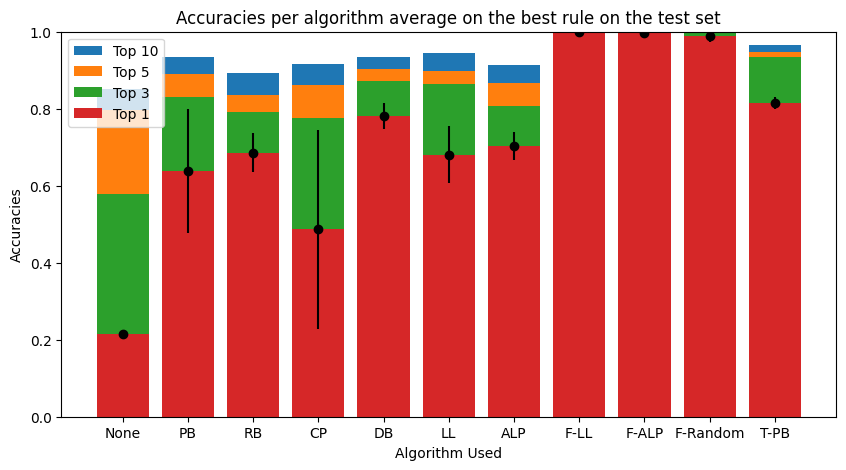

In [8]:
#Plot bar plot of success rate per algorithm
plt.figure(figsize=(10,5))
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 10"]) for rate in accuracies_per_algo.values()], label="Top 10")
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 5"]) for rate in accuracies_per_algo.values()], label="Top 5")
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 3"]) for rate in accuracies_per_algo.values()], label="Top 3")
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo.values()], label="Top 1")
plt.legend()
plt.errorbar(accuracies_per_algo.keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo.values()], [np.std(rate["Top 1"]) for rate in accuracies_per_algo.values()], fmt='o', color='black')
plt.title("Accuracies per algorithm average on the best rule on the test set")
plt.xlabel("Algorithm Used")
plt.ylabel("Accuracies")
plt.ylim(0,1)
plt.show()

# Results per transition type

In [9]:
unique_transition_type = ["standing", "holding1", "holding2","transformP", "transformSH", "transformBH"]
all_accuracies = {key:{"Top 1":[0 for _ in range(len(all_rules))], "Top 3":[0 for _ in range(len(all_rules))], "Top 5":[0 for _ in range(len(all_rules))], "Top 10":[0 for _ in range(len(all_rules))]} for key in unique_transition_type}
n_transitions_per_type = {key:0 for key in unique_transition_type}

#Check if higher score is reached on the true observation for each rule
for i_episode, score_episode in enumerate(all_scores):
    for i_transition, score_transition in enumerate(score_episode):
        for i_rule in range(len(all_rules)):
            transition_type = all_transition_type[i_episode][i_transition][all_index_true[i_episode][i_transition]]
            true_score = score_transition[i_rule][all_index_true[i_episode][i_transition]]
            sorted_score_transition = sorted(score_transition[i_rule], reverse=True)
            index_true = sorted_score_transition.index(true_score)
            if index_true < 10:
                all_accuracies[transition_type]["Top 10"][i_rule] += 1
                if index_true < 5:
                    all_accuracies[transition_type]["Top 5"][i_rule] += 1
                    if index_true < 3:
                        all_accuracies[transition_type]["Top 3"][i_rule] += 1
                        if index_true ==0:
                            all_accuracies[transition_type]["Top 1"][i_rule] += 1
        n_transitions_per_type[transition_type] +=1                

    
for transition_type in all_accuracies.keys():
    for key, values in all_accuracies[transition_type].items():
        all_accuracies[transition_type][key] = [value/n_transitions_per_type[transition_type] if n_transitions_per_type[transition_type] >0 else 0 for value in values]

In [10]:
#Regroup success rate per algorithm
accuracies_per_algo_per_type = {key:{} for key in unique_transition_type}
for transition_type in unique_transition_type:
    for i_algo, algo in enumerate(algorithm_used):
        if algo not in accuracies_per_algo_per_type[transition_type]:
            accuracies_per_algo_per_type[transition_type][algo] = {"Top 1": [], "Top 3": [], "Top 5": [], "Top 10": []}
        accuracies_per_algo_per_type[transition_type][algo]["Top 1"].append(all_accuracies[transition_type]["Top 1"][i_algo])
        accuracies_per_algo_per_type[transition_type][algo]["Top 3"].append(all_accuracies[transition_type]["Top 3"][i_algo])
        accuracies_per_algo_per_type[transition_type][algo]["Top 5"].append(all_accuracies[transition_type]["Top 5"][i_algo])
        accuracies_per_algo_per_type[transition_type][algo]["Top 10"].append(all_accuracies[transition_type]["Top 10"][i_algo])

In [11]:
# Get performance for all transition for an algorithm for latex
algo_name = "F-Random"
top = "Top 3"
for transition_type in unique_transition_type:
    print(format(np.mean(accuracies_per_algo_per_type[transition_type][algo_name][top]), ".2f") + " || " + format(np.std(accuracies_per_algo_per_type[transition_type][algo_name][top]), ".2f"), end=" & ")
print()
print(" & ".join([format(np.mean(rate), ".2f") for rate in [accuracies_per_algo_per_type[transition_type][algo_name][top] for transition_type in unique_transition_type]]))

1.00 || 0.00 & 1.00 || 0.00 & 1.00 || 0.00 & 1.00 || 0.00 & 1.00 || 0.00 & 1.00 || 0.00 & 
1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00


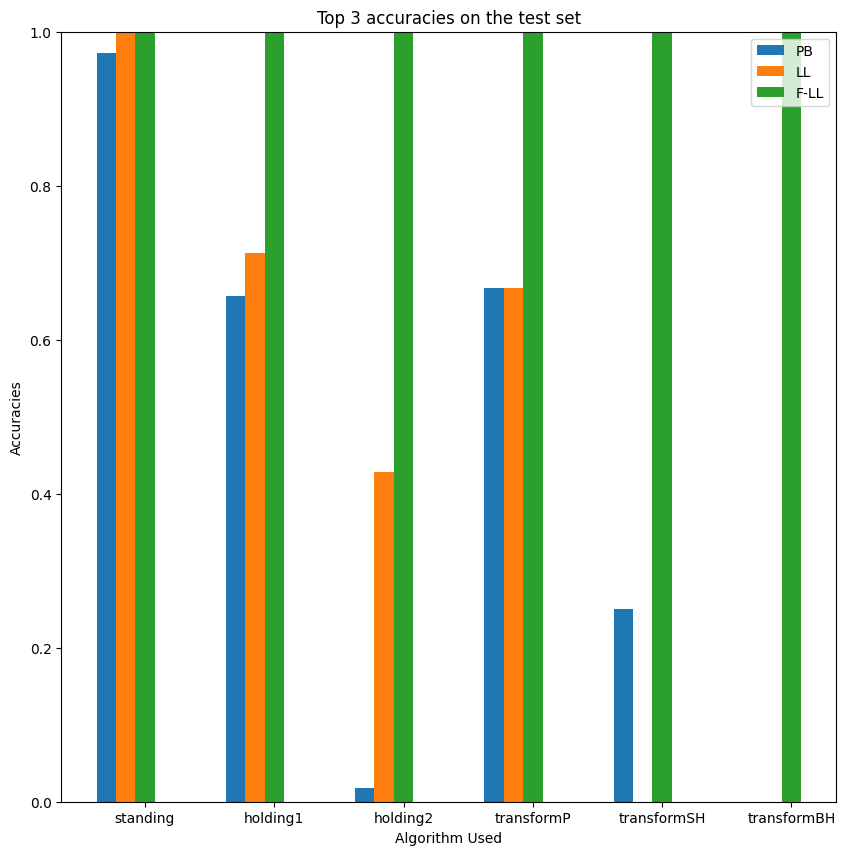

In [12]:
#Plot bar plot of success rate per transition for specific algorithm
algo_names = ["PB", "LL","F-LL"]
top = "Top 3"
plt.figure(figsize=(10,10))
for i_algo_name, algo_name in enumerate(algo_names):
    plt.bar(np.arange(len(unique_transition_type)) + i_algo_name*0.15, [np.mean(rate) for rate in [accuracies_per_algo_per_type[transition_type][algo_name][top] for transition_type in unique_transition_type]], label=algo_name, width=0.15, tick_label=unique_transition_type)
    plt.legend()
    plt.ylim(0,1)
    # plt.errorbar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], [np.std(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], fmt='o', color='black')
    plt.title(f"{top} accuracies on the test set")
    plt.xlabel("Algorithm Used")
    plt.ylabel("Accuracies")
plt.show()

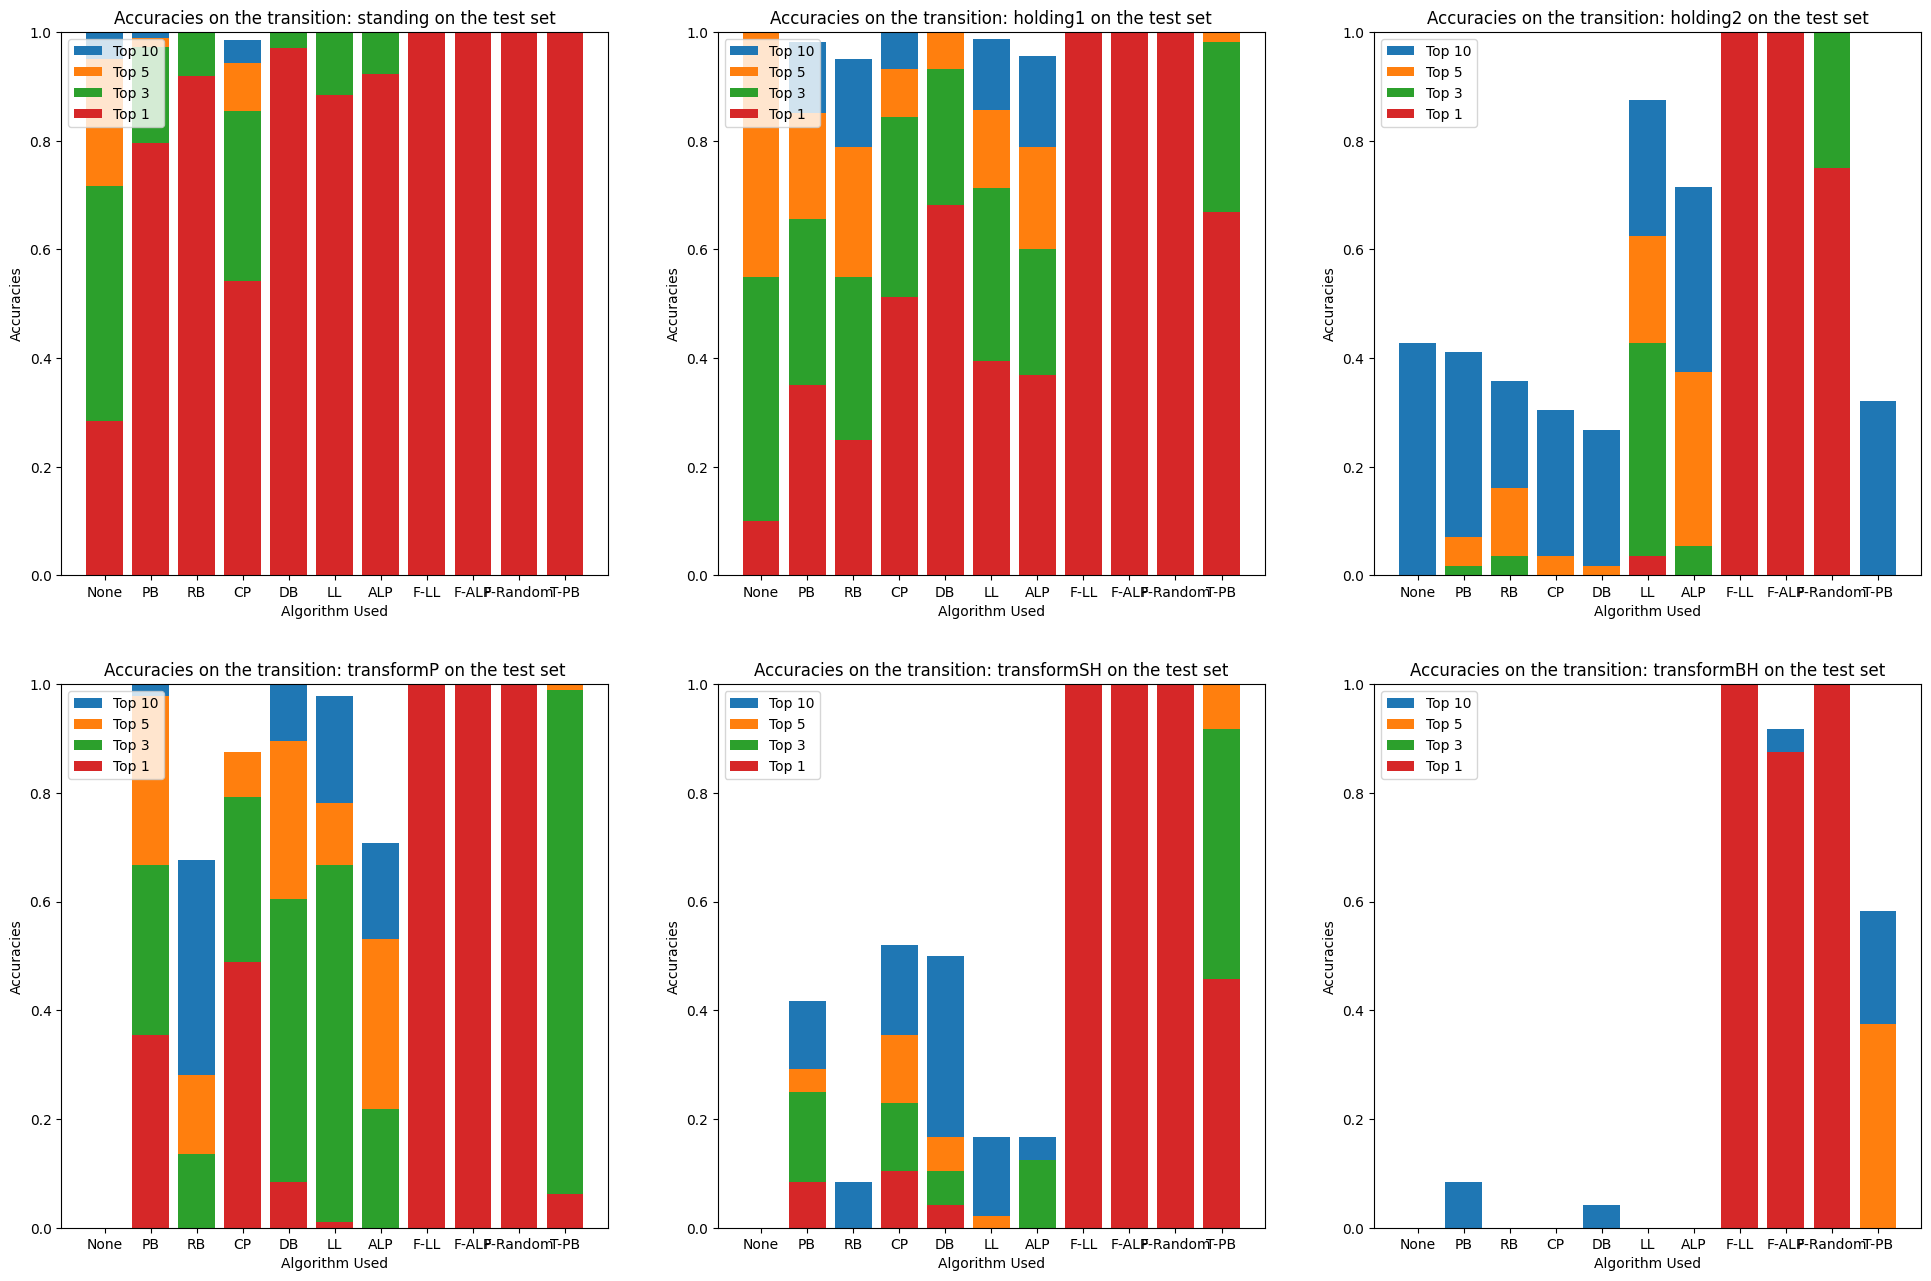

In [13]:
#Plot bar plot of success rate per algorithm for each transition type
plt.figure(figsize=(24,24))
for i_type, transition_type in enumerate(unique_transition_type):
    plt.subplot(3,3,i_type+1)
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 10"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 10")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 5"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 5")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 3"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 3")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 1")
    plt.legend()
    plt.ylim(0,1)
    # plt.errorbar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], [np.std(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], fmt='o', color='black')
    plt.title(f"Accuracies on the transition: {transition_type} on the test set")
    plt.xlabel("Algorithm Used")
    plt.ylabel("Accuracies")
plt.show()

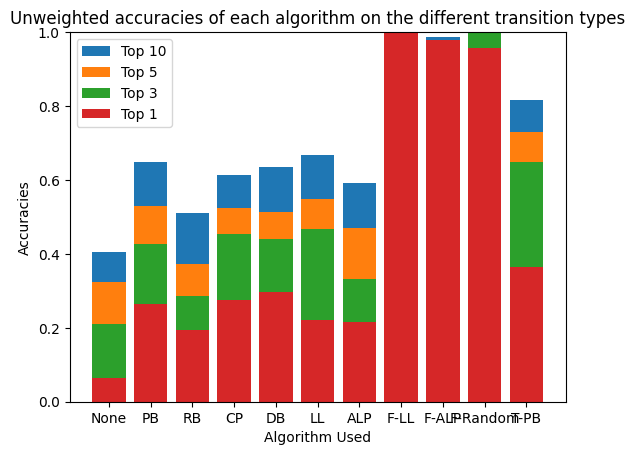

In [14]:
#Plot bar plot of success rate per algorithm for each transition type
plt.figure()
algorithm_names = accuracies_per_algo_per_type["standing"].keys()
mean_top1 = np.array([[np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()] for transition_type in unique_transition_type]).mean(axis=0)
mean_top3 = np.array([[np.mean(rate["Top 3"]) for rate in accuracies_per_algo_per_type[transition_type].values()] for transition_type in unique_transition_type]).mean(axis=0)
mean_top5 = np.array([[np.mean(rate["Top 5"]) for rate in accuracies_per_algo_per_type[transition_type].values()] for transition_type in unique_transition_type]).mean(axis=0)
mean_top10 = np.array([[np.mean(rate["Top 10"]) for rate in accuracies_per_algo_per_type[transition_type].values()] for transition_type in unique_transition_type]).mean(axis=0)
plt.bar(algorithm_names, mean_top10, label="Top 10")
plt.bar(algorithm_names, mean_top5, label="Top 5")
plt.bar(algorithm_names, mean_top3, label="Top 3")
plt.bar(algorithm_names, mean_top1, label="Top 1")
plt.legend()
plt.title("Unweighted accuracies of each algorithm on the different transition types")
plt.xlabel("Algorithm Used")
plt.ylabel("Accuracies")
plt.ylim(0,1)
plt.show()

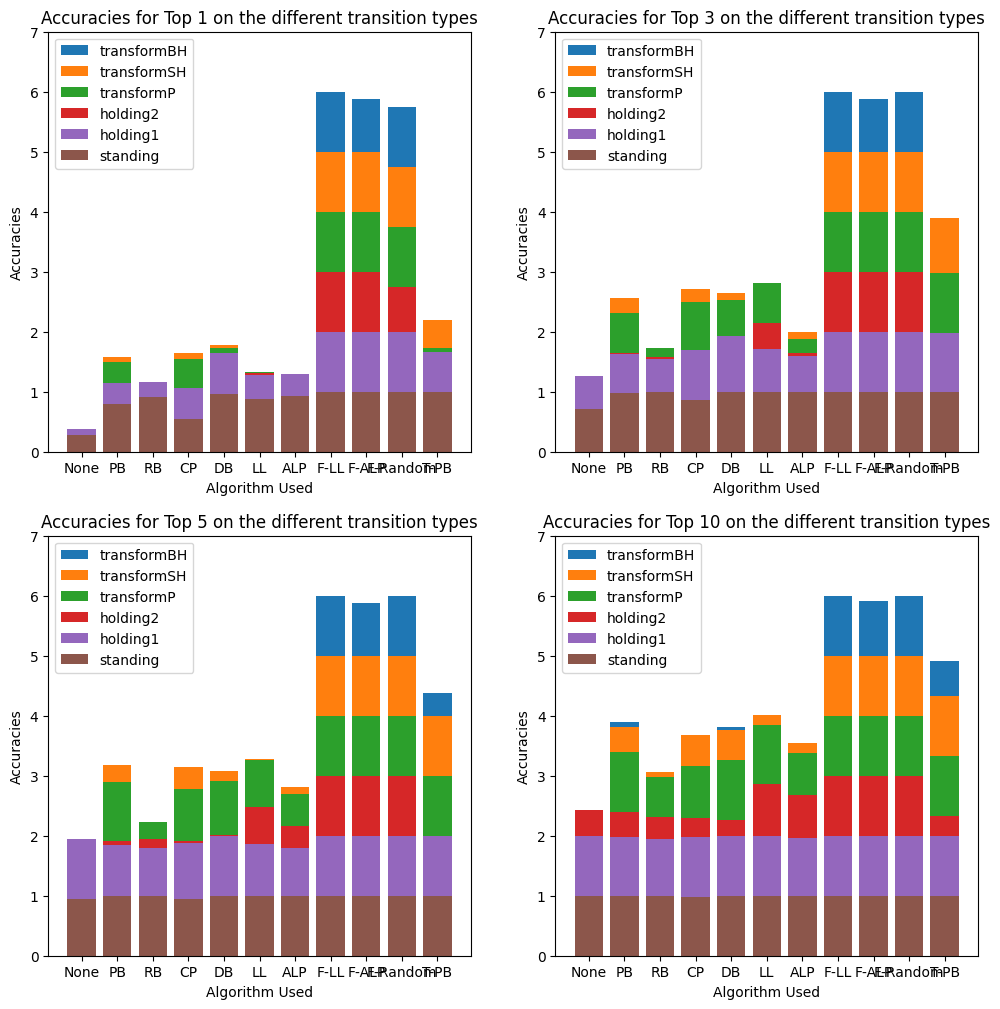

In [15]:
#Plot bar plot of success rate per algorithm for each transition type
plt.figure(figsize=(12,12))
for i_top, top in enumerate(["Top 1", "Top 3", "Top 5", "Top 10"]):
    plt.subplot(2,2,i_top+1)
    top_per_algo_per_acc = np.cumsum(np.array([[np.mean(rate[top]) for rate in accuracies_per_algo_per_type[transition_type].values()] for transition_type in unique_transition_type]), axis=0)
    for i_transition in range(len(unique_transition_type)-1, -1, -1):
        plt.bar(algorithm_names, top_per_algo_per_acc[i_transition], label=f"{unique_transition_type[i_transition]}")
    plt.legend()
    plt.title(f"Accuracies for {top} on the different transition types")
    plt.xlabel("Algorithm Used")
    plt.ylabel("Accuracies")
    plt.ylim(0,7)
plt.show()

# Gain distribution for single example

In [16]:
all_rules[0], all_rules[7]

('None',
 '1. Introduction: Navigate to or stand on a target object/seed for transformation. For example: "You go to the beet seed. o: You are standing on the beet seed."\n2. Absence of action or mere observation results in the object/seed and water mutation. For example: "You give the water. o: The water and the object transform into the object."\n3. Holding an object alone will combine the present objects. For example: "You go to the baby elephant. a: You pick up the pea, the beet, and the water. o: The pea, the beet, the water, and the baby elephant transform into the elephant."')

In [17]:
target_transition_type = "transformBH"
for i_episode, transitions in enumerate(all_transition_type):
    for i_transition, transition in enumerate(transitions):
        if transition[all_index_true[i_episode][i_transition]] == target_transition_type:
            indices = (i_episode, i_transition)
            print(transition)
            print(indices)
            print(all_index_true[i_episode][i_transition])

['transformBH', 'transformBH', 'transformBH', 'transformBH', 'transformBH', 'transformBH', 'holding2', 'holding2', 'holding2', 'holding1', 'holding2', 'holding2', 'holding2', 'holding1', 'holding2', 'holding2', 'holding2', 'holding1', 'holding2', 'holding2', 'holding2', 'holding1', 'standing', 'standing', 'standing', 'standing', 'standing']
(3, 18)
3
['transformBH', 'transformBH', 'transformBH', 'transformBH', 'transformBH', 'transformBH', 'holding2', 'holding2', 'holding2', 'holding1', 'holding2', 'holding2', 'holding2', 'holding1', 'holding2', 'holding2', 'holding2', 'holding1', 'holding2', 'holding2', 'holding2', 'holding1', 'standing', 'standing', 'standing', 'standing', 'standing']
(4, 18)
3
['transformBH', 'transformBH', 'transformBH', 'transformBH', 'transformBH', 'transformBH', 'holding2', 'holding2', 'holding2', 'holding1', 'holding2', 'holding2', 'holding2', 'holding1', 'holding2', 'holding2', 'holding2', 'holding1', 'holding2', 'holding2', 'holding2', 'holding1', 'standing',

In [18]:
indices = (3,18)
standing_index = 23
print(all_transition_type[indices[0]] [indices[1]][all_index_true[indices[0]][indices[1]]])
print(all_index_true[indices[0]][indices[1]])

transformBH
3


In [19]:
index_rule = 7
all_scores[indices[0]][indices[1]][index_rule][standing_index],all_scores[indices[0]][indices[1]][index_rule][all_index_true[indices[0]][indices[1]]]

(-7.636058807373047, -11.632596015930176)

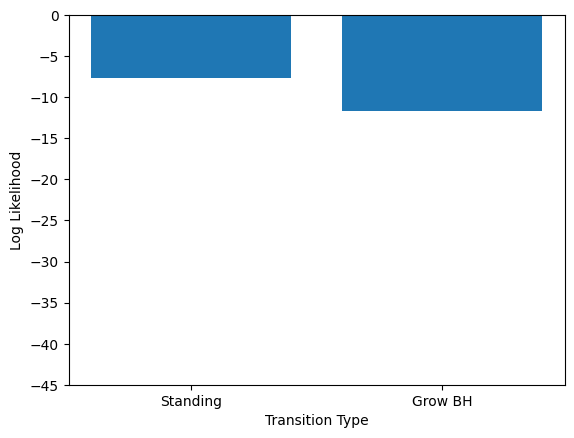

In [20]:
index_rule = 7
values = [all_scores[indices[0]][indices[1]][index_rule][standing_index],all_scores[indices[0]][indices[1]][index_rule][all_index_true[indices[0]][indices[1]]]]
plt.figure()
plt.bar(["Standing","Grow BH", ], values)
plt.ylabel("Log Likelihood")
plt.xlabel("Transition Type")
plt.ylim(-45,0)
plt.show()

# Compare likelihood for few selected example

In [29]:
# Select example for custom type
different_transition_type = ["standing", "holding1", "holding2","transformP", "transformSH", "transformBH"]
all_types_indices= {}
for i_episode, transitions in enumerate(all_transition_type):
    for i_transition, transition in enumerate(transitions):
        current_transition_type = transition[all_index_true[i_episode][i_transition]]
        if current_transition_type not in all_types_indices:
            all_types_indices[current_transition_type] = [(i_episode, i_transition)]
        else:
            all_types_indices[current_transition_type].append((i_episode, i_transition))

Rule:  1. Introduction: Navigate to or stand on a target object/seed for transformation. For example: "You go to the beet seed. o: You are standing on the beet seed."
2. Absence of action or mere observation results in the object/seed and water mutation. For example: "You give the water. o: The water and the object transform into the object."
3. Holding an object alone will combine the present objects. For example: "You go to the baby elephant. a: You pick up the pea, the beet, and the water. o: The pea, the beet, the water, and the baby elephant transform into the elephant." type:  PB
Indices:  (5, 10)  True observation:  2
[ 2 33  0 34 35]
['transformP' 'standing' 'transformP' 'standing' 'standing']
[-5.05877542 -5.34330177 -5.61916924 -7.46900368 -7.47617435]


/tmp/ipykernel_51223/3001083138.py:25: RuntimeWarning: Mean of empty slice.
  plt.bar(transition_type_to_index.keys(),[values[indices].mean() for indices in transition_type_to_index.values()], yerr=[np.std(values[indices]) for indices in transition_type_to_index.values()])


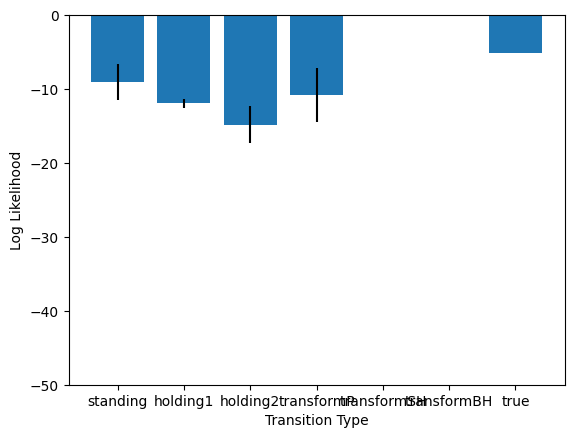

Indices:  (5, 3)  True observation:  3
[ 3 46 47  0 49]
['transformP' 'standing' 'standing' 'transformP' 'standing']
[-5.19690561 -5.62301636 -7.4169445  -7.41706467 -7.6698885 ]


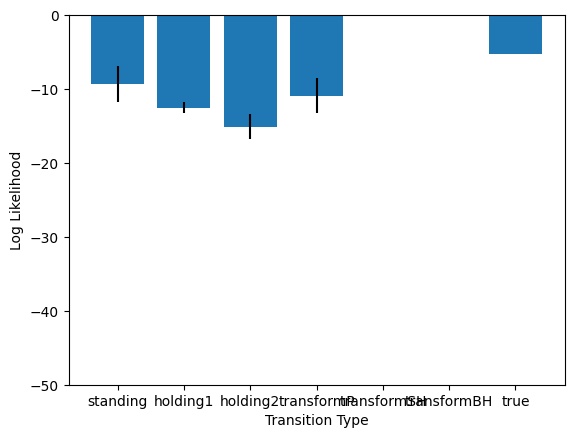

Indices:  (0, 3)  True observation:  3
[ 3 35 36  1 34]
['transformP' 'standing' 'standing' 'transformP' 'standing']
[-5.05429125 -5.74489689 -5.79265213 -6.82112789 -7.76075935]


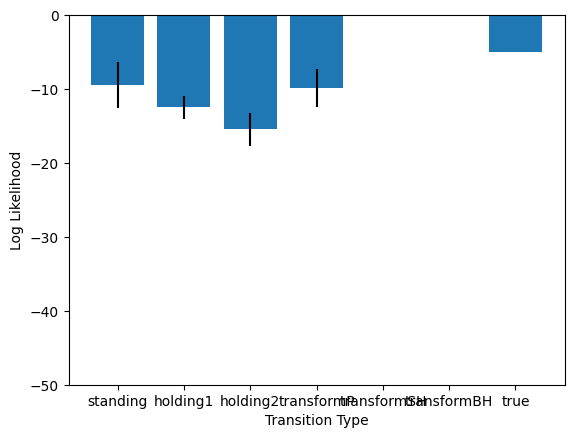

Indices:  (4, 15)  True observation:  1
[ 1 29 30 32  0]
['transformP' 'standing' 'standing' 'standing' 'transformP']
[-4.89610529 -5.81935501 -8.50354671 -8.99388599 -9.08739853]


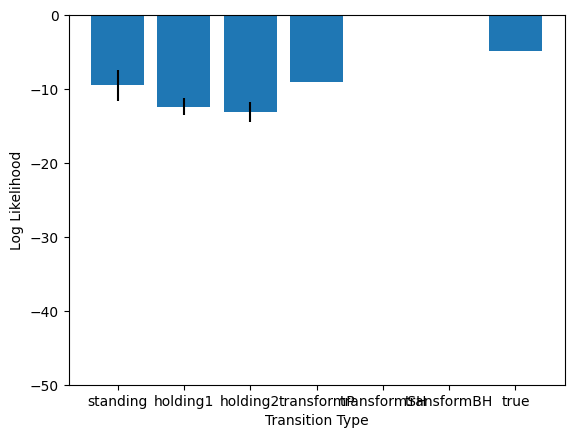

Indices:  (3, 15)  True observation:  1
[ 1 29  0 32 30]
['transformP' 'standing' 'transformP' 'standing' 'standing']
[-4.84413242 -5.65151501 -7.19800854 -8.77149391 -9.63899803]


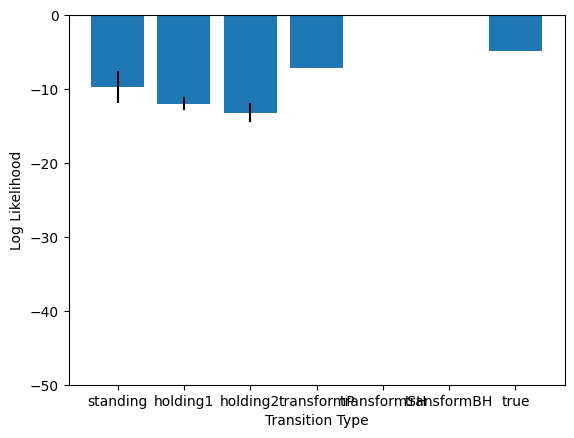

In [48]:
# Check different log probs for an example of a type:
# We check no rule for now
index_rule = 7
print("Rule: ", all_rules[index_rule], "type: ", algorithm_used[index_rule])
transition_type, index = "transformP", 0
np.random.seed(42)
shuffled_indices = np.random.permutation(len(all_types_indices[transition_type]))
for index in range(5):
    indices = all_types_indices[transition_type][shuffled_indices[index]]
    transition = all_transition_type[indices[0]][indices[1]]
    # Regroup transition type and true observation
    transition_type_to_index = {type: [] for type in different_transition_type+["true"]}
    for incr, type in enumerate(transition):
        if incr == all_index_true[indices[0]][indices[1]]:
            transition_type_to_index["true"].append(incr)
        else:
            transition_type_to_index[type].append(incr)
    # Plot the result for the current example
    values = np.array(all_scores[indices[0]][indices[1]][index_rule])
    indices_sorted = np.argsort(-values)
    print("Indices: ", indices, " True observation: ", all_index_true[indices[0]][indices[1]])
    print(indices_sorted[:5])
    print(np.array(all_transition_type[indices[0]][indices[1]])[indices_sorted[:5]])  
    print(values[indices_sorted[:5]])
    plt.bar(transition_type_to_index.keys(),[values[indices].mean() for indices in transition_type_to_index.values()], yerr=[np.std(values[indices]) for indices in transition_type_to_index.values()])
    plt.ylim(-50,0)
    plt.ylabel("Log Likelihood")
    plt.xlabel("Transition Type")
    plt.show()